## This notebook shows examples for progression analysis

### get_score_AGIS: severity score (from vfprogression package)

#### Description: The Advanced Glaucoma Intervention Study (AGIS) is a multicenter, randomized clinical trial designed (1) to determine the better of two surgical management strategies for glaucoma when medical treatment alone no longer adequately controls the disease and (2) to clarify the clinical course and prognosis of open-angle glaucoma after surgical interventions have begun [1].
### [1] Advanced Glaucoma Intervention Study. 2. Visual field test scoring and reliability. Ophthalmology. 1994; 101: 1445–1455.

In [1]:
from PyVisualFields import vfprogression

df_VFs_py = vfprogression.data_vfseries() # get data

df_VF_py = df_VFs_py.iloc[15]

score = vfprogression.get_score_AGIS(df_VF_py)
score

11

### get_score_CIGTS: sverity score (from vfprogression package)

#### Description: The Collaborative Initial Glaucoma Treatment Study (CIGTS) is a randomized, controlled clinical trial designed to determine whether patients with newly diagnosed open-angle glaucoma (primary, pigmentary, or pseudoexfoliative) are better treated by initial treatment with medications or by immediate filtration surgery [1].
### [1] Musch DC, Lichter PR, Guire KE, Standardi CL. The Collaborative Initial Glaucoma Treatment Study: study design, methods, and baseline characteristics of enrolled patients. Ophthalmology. 1999; 106: 653–662.

In [9]:
from PyVisualFields import vfprogression

df_VFs_py = vfprogression.data_vfseries() #get data
df_VF_py = df_VFs_py.iloc[15]

score = vfprogression.get_score_CIGTS(df_VF_py)
score

11.3461538461538

### progression.cigts: progression analysis based on CIGTS VF progression  (from vfprogression package)


#### Description: The function returns the progression of visual field test based on 52 or 54 total deviation probabilities (tdp). CIGTS VF progression (Musch et al., 1999).

In [3]:
from PyVisualFields import vfprogression

###### at least 5 VFs required
df_VFs_py = vfprogression.data_cigts()

results = vfprogression.progression_cigts(df_VFs_py)# input data needs to have columns tdp1, ... tdp54
print(results)# (left eye, right eye)

('worsening', 'stable')


### Another example 

In [4]:
from PyVisualFields import vfprogression

df_VFs_py_ = vfprogression.data_vfseries() # get data 
results = vfprogression.progression_cigts(df_VFs_py_)  # input data needs to have columns tdp1, ... tdp54
print(results)# (left eye, right eye)

('worsening', 'stable')


### progression_plrnouri2012: progression analysis based on Nouri-Mahdavi 2012  (from vfprogression package)
#### Description: returns the progression criterion, using Pointwise Linear Regression (PLR) progression detection method according to Nouri-Mahdavi et al. (2012).

In [5]:
from PyVisualFields import vfprogression

df_VFs_py = vfprogression.data_plrnouri2012()
results = vfprogression.progression_plrnouri2012(df_VFs_py)
print(results)# (left eye, right eye)

('stable', 'stable')


### progression_vfi: progression analysis based on VFI (significant slope, p<=0.05)(from vfprogression package).
#### Description: returns the progression criterion used in Aptel et al. (2015).

In [6]:
from PyVisualFields import vfprogression

###### at least 5 VFs required
df_VFs_py = vfprogression.data_vfi()
results = vfprogression.progression_vfi(df_VFs_py)
print(results)# (left eye, right eye)

('worsening', 'worsening')


### progression_schell2014: progression analysis based on Schell 2014 VF  (from vfprogression package)

#### Description: progression.schell2014 returns the progression analysis by Schell et al. 2014, which is essentially like CIGTS but with MD, and only one follow-up is enough to confirm progression.

In [7]:
from PyVisualFields import vfprogression

###### at least 5 VFs required
df_VFs_py = vfprogression.data_schell2014()

results = vfprogression.progression_schell2014(df_VFs_py)
print(results)# (left eye, right eye)

('worsening', 'stable')


### progression_agis: progression analysis based on AGIS (from vfprogression package)

#### A data frame sample including the following visual field related measurement for two eyes

In [8]:
from PyVisualFields import vfprogression

###### at least 5 VFs required
df_VFs_py_ = vfprogression.data_vfseries()
results = vfprogression.progression_agis(df_VFs_py_)
print(results)# (left eye, right eye)


('stable', 'stable')


### glr: Linear regression with global indices (from visualFields package)

odict_keys(['id', 'eye', 'type', 'testSlope', 'nvisits', 'dates', 'years', 'data', 'pred', 'sl', 'int', 'se', 'tval', 'pval'])


Text(0.5, 1.0, 'mean deviation of total deviation values')

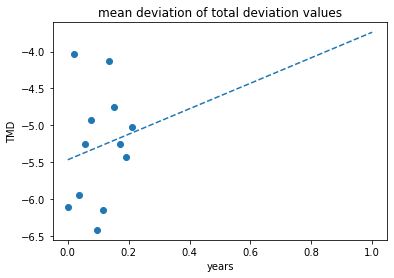

In [1]:
'''
performs global linear regression analysis

# type: 
    ‘ms‘: mean sensitivity
    ‘ss‘: standard deviation of sensitivities
    ‘md‘: mean deviation of total deviation values
    ‘sd‘: standard deviation of total deviation values
    ‘pmd‘: pattern mean deviation
    ‘psd‘: pattern standard deviation
    ‘vfi‘: VFI    
    ‘gh‘: general height 
    
# testSlope:
    slope, or slopes, to test as null hypothesis. Default is 0.
    
    
return values:
    
    - id patient ID
    – eye patient eye
    – type type of data analysis. . 
    – testSlope slope for glr or list of slopes for plr to test as null hypotheses
    – nvisits number of visits
    – years years from baseline. Used for the pointwise linear regression analysis
    – data data analyzed. 
    – pred predicted values. Each column is a location of the visual field used for the analysis.
    Each row is a visit (as many as years)
    – sl slopes estimated at each location for pointwise (simple) linear regression
    – int intercept estimated at each location for pointwise (simple) linear regression
    – tval t-values obtained for the left-tailed-t-tests for the slopes obtained in the pointwise
    (simple) linear regression at each location
    – pval p-values obtained for the left-tailed t-tests for the slopes obtained
'''

from PyVisualFields import visualFields
import numpy as np
import matplotlib.pyplot as plt

df_VFs_py = visualFields.data_vfpwgRetest24d2()
df_VFs_py = df_VFs_py.loc[(df_VFs_py.id==1) & (df_VFs_py.eye=='OD')]
df_gi = visualFields.getgl(df_VFs_py) # get global indices
res = visualFields.glr(df_gi, type = "md", testSlope = 0) #linear regression with global indices
print(res.keys())


intercept =  float(res['int'])
slope = float(res['sl'])
se =  float(res['se'])
tval = float(res['tval'])
pval = float(res['pval'])
years = res['years']


x = np.linspace(0, 1, num=50)
y = df_gi['tmd'].values
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]
plt.plot(x, abline_values, '--')
plt.scatter(years, y)
plt.xlabel('years')
plt.ylabel('TMD')
plt.title('mean deviation of total deviation values')

### plr: performs pointwise linear regression (PLR) analysis (from visualFields package)

In [2]:
''' performs pointwise linear regression (PLR) analysis

# type: 
    ‘s‘: sensitivities
    ‘td‘: total deviation values
    ‘pd‘: pattern deviation values
    
# testSlope:
    slope, or slopes, to test as null hypothesis. Default is 0.
    if a single value, then the same null hypothesis is used for all locations.
    If a vector of values, then (for plr
    and poplr) each location of the visual field will have a different null hypothesis.
    The length of testSlope must be 1 or equal to the number of locations to be used
    in the PLR or PoPLR analysis
    
    
return values:
    
    - id patient ID
    – eye patient eye
    – type type of data analysis. . 
    – testSlope slope for glr or list of slopes for plr to test as null hypotheses
    – nvisits number of visits
    – years years from baseline. Used for the pointwise linear regression analysis
    – data data analyzed. 
    – pred predicted values. Each column is a location of the visual field used for the analysis.
    Each row is a visit (as many as years)
    – sl slopes estimated at each location for pointwise (simple) linear regression
    – int intercept estimated at each location for pointwise (simple) linear regression
    – tval t-values obtained for the left-tailed-t-tests for the slopes obtained in the pointwise
    (simple) linear regression at each location
    – pval p-values obtained for the left-tailed t-tests for the slopes obtained
'''

from PyVisualFields import visualFields
import numpy as np


df_VFs_py = visualFields.data_vfpwgRetest24d2()
df_VFs_py = df_VFs_py.loc[(df_VFs_py.id==1) & (df_VFs_py.eye=='OD')]
res = visualFields.plr(df_VFs_py, type='s', testSlope=0) # pointwise linear regression (PLR) 

print('===> keys is res:  \n', res.keys())
intercept = res['int']
slope = res['sl']
standarderror = res['se']
tval = res['tval']
pval = res['pval']
print('===> keys in slope: \n', slope.keys())
arrObejct = np.asarray(list(slope.items()), dtype=object)
slopes_numpy = np.asarray(arrObejct[:,1], dtype=float) 
print('===>slope values:  \n', slopes_numpy)
arrObejct = np.asarray(list(intercept.items()), dtype=object)
intercepts_numpy = np.asarray(arrObejct[:,1], dtype=float) 
print('===> intercepts values:  \n', intercepts_numpy)

===> keys is res:  
 odict_keys(['id', 'eye', 'type', 'testSlope', 'nvisits', 'dates', 'years', 'data', 'pred', 'sl', 'int', 'se', 'tval', 'pval'])
===> keys in slope: 
 odict_keys(['l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25', 'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37', 'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49', 'l50', 'l51', 'l52', 'l53', 'l54'])
===>slope values:  
 [ 10.03434066  -2.37175325   3.83129371  -2.18931069  -7.84502997
  19.88623876  15.69005994   1.45954046  14.5954046   15.14273227
 -14.96028971   5.29083417 -52.90834166   2.91908092   5.83816184
 -38.13049451  13.13586414   4.37862138 -29.92057942 -28.2785964
 -81.36938062   9.30457043  14.77784715  11.128996     7.66258741
          nan  -2.91908092   5.47327672   8.02747253   7.2977023
  14.77784715   4.74350649   9.66

### poplr: performs PoPLR regression analysis as in O’Leary et al (from visualFields package). 

#### Reference: N. O’Leary, B. C. Chauhan, and P. H. Artes. Visual field progression in glaucoma: estimating the overall significance of deterioration with permutation analyses of pointwise linear regression (PoPLR). Investigative Ophthalmology and Visual Science, 53, 2012

In [4]:
'''
performs PoPLR analysis as in O’Leary et al:
    N. O’Leary, B. C. Chauhan, and P. H. Artes. Visual field progression in glaucoma: estimating
    the overall significance of deterioration with permutation analyses of pointwise linear regression
    (PoPLR). Investigative Ophthalmology and Visual Science, 53, 2012

# type: 
    ‘s‘: sensitivities
    ‘td‘: total deviation values
    ‘pd‘: pattern deviation values
    
# testSlope:
    slope, or slopes, to test as null hypothesis. Default is 0.
    if a single value, then the same null hypothesis is used for all locations.
    If a vector of values, then (for plr
    and poplr) each location of the visual field will have a different null hypothesis.
    The length of testSlope must be 1 or equal to the number of locations to be used
    in the PLR or PoPLR analysis
    
# nperm:
    number of permutations. If the number of visits is 7 or less, then nperm =factorial(nrow(vf)).
# trunc:        
    truncation value for the Truncated Product Method (see reference)
    
    
return values:
    
    - id patient ID
    – eye patient eye
    – type type of data analysis. . 
    – testSlope slope for glr or list of slopes for plr to test as null hypotheses
    – nvisits number of visits
    – years years from baseline. Used for the pointwise linear regression analysis
    – data data analyzed. 
    – pred predicted values. Each column is a location of the visual field used for the analysis.
    Each row is a visit (as many as years)
    – sl slopes estimated at each location for pointwise (simple) linear regression
    – int intercept estimated at each location for pointwise (simple) linear regression
    – tval t-values obtained for the left-tailed-t-tests for the slopes obtained in the pointwise
    (simple) linear regression at each location
    – pval p-values obtained for the left-tailed t-tests for the slopes obtained
    
    – csl the modifed Fisher’s S-statistic for the left-tailed permutation test
    – cslp the p-value for the left-tailed permutation test
    – csr the modifed Fisher’s S-statistic for the right-tailed permutation test
    – csrp the p-value for the right-tailed permutation test
    – pstats a list with the poinwise slopes (‘sl‘), intercepts (‘int‘), standard errors (‘se‘),
    and p-values (‘pval‘) obtained for the series at each location analyzed and for all nperm
    permutations (in ‘permutations‘)
    – cstats a list with all combined stats:
    * csl,csr the combined Fisher S-statistics for the left- and right-tailed permutation
    tests respectively
    * cslp,csrp the corresponding p-values for the permutation tests
    * cslall,csrall the combined Fisher S-statistics for all permutations
    
'''

from PyVisualFields import visualFields
import numpy as np

# Permutation of PLR with TD values
df_VFs_py = visualFields.data_vfpwgRetest24d2()
df_VFs_py = df_VFs_py.loc[(df_VFs_py.id==1) & (df_VFs_py.eye=='OD')]
res = visualFields.poplr(df_VFs_py, type = "td", testSlope = 0, nperm = 'default', trunc = 1) # Permutation of PLR with TD values
print(res.keys())

odict_keys(['id', 'eye', 'type', 'testSlope', 'nvisits', 'dates', 'years', 'data', 'pred', 'sl', 'int', 'se', 'tval', 'pval', 'nperm', 'csl', 'cslp', 'csr', 'csrp', 'pstats', 'cstats'])
